#  Simple Linear Regression

# Load house sales data


In [118]:
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as  plt

%matplotlib inline

In [119]:

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [120]:
sales =pd.read_csv('C:/Users/VIBIN/Desktop/practice/data/kc_house_data.csv',dtype=dtype_dict)
sales_train = pd.read_csv('C:/Users/VIBIN/Desktop/practice/data/kc_house_train_data.csv',dtype=dtype_dict)
sales_test = pd.read_csv('C:/Users/VIBIN/Desktop/practice/data/kc_house_test_data.csv',dtype=dtype_dict)

In [121]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


# Split data into training and testing

In [122]:
#train_data,test_data = sales.random_split(.8,seed=0)
train_data, test_data = model_selection.train_test_split(sales,test_size = 0.2, random_state = 1)

# Generic simple linear regression function 

In [123]:
def simple_linear_regression(data, input_feature, output_feature):
    y = data[output_feature]
    columns = [input_feature]
    X1 = pd.DataFrame(data, columns = columns)
    X= X1.copy()
    est =linear_model.LinearRegression()
        
       
    
    est.fit(X, y)
    y_pred = est.predict(X)
    intercept = est.intercept_
    slope = est.coef_

    return (y_pred,intercept, slope)

In [124]:
y_pred,sqft_intercept, sqft_slope = simple_linear_regression(sales_train,'sqft_living','price')

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: -47116.07907289325
Slope: [281.95883963]


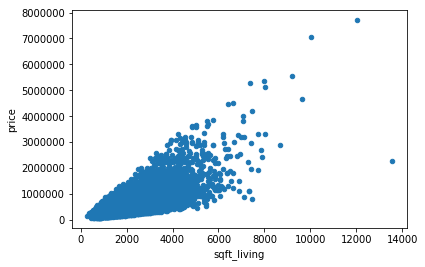

In [125]:
sales_train.plot.scatter('sqft_living','price')

# Predicting Values

In [126]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = (input_feature * slope) + intercept
    
    return predicted_values

In [127]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print("The estimated price for a house with "+ str(my_house_sqft) +" squarefeet is $ " +str(np.round(float(estimated_price), 2))) 

The estimated price for a house with 2650 squarefeet is $ 700074.85


# Residual Sum of Squares

In [128]:
def get_residual_sum_of_squares(data, input_feature, output_feature,y_pred):
    y= data[output_feature]
    RSS = ((y - y_pred)**2).sum()
    

    return(RSS)

In [129]:
rss_prices_on_sqft = get_residual_sum_of_squares(sales_train,'sqft_living','price',y_pred)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1201918354177283.2


# Predict the squarefeet given price

In [130]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (float(output) - float(intercept))/float(slope)
    return estimated_feature

In [131]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


# New Model: estimate prices from bedrooms

In [132]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
y_pred1,sqft_intercept, sqft_slope = simple_linear_regression(sales_train,'bedrooms','price')

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))


Intercept: 109473.17762296111
Slope: [127588.95293399]


In [133]:
# Compute RSS when using bedrooms on TEST data:
rss_prices_on_sqft = get_residual_sum_of_squares(sales_test,'sqft_living','price',y_pred[:4229])
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 837297347575956.8


In [135]:
# Compute RSS when using squarefeet on TEST data:
rss_prices_on_bedroom = get_residual_sum_of_squares(sales_test,'bedrooms','price',y_pred1[:4229])
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 595136840538838.6


# Multiple Regression 

In [200]:
def multiple_linear_regression(data, input_feature, output_feature):
    y = data[output_feature]
    X1 = pd.DataFrame(data, columns = input_feature)
    X= X1.copy()
    #X.fillna(X.mean())
    #X.replace(np.inf, 0)
    #X.replace(-np.inf, 0)
    X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)#df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
    est =linear_model.LinearRegression()
    est.fit(X, y)
    y_pred = est.predict(X)
    intercept = est.intercept_
    slope = est.coef_

    return (y_pred,intercept, slope)

In [201]:
input_feature = ['sqft_living', 'bedrooms', 'bathrooms']
y_pred,intercept, slope =  multiple_linear_regression(sales_train, input_feature, 'price')
print ("Intercept: " + str(intercept))
print ("Slope: " + str(slope))

Intercept: 87912.86581496504
Slope: [   315.40669062 -65081.88711588   6942.16598637]


In [202]:
def get_residual_sum_of_squares(prediction, outcome):
    # First get the predictions
    
    #RSS = ((prediction - outcome)**2).sum()
    residuals = prediction - outcome
    # Then compute the residuals/errors
    RSS = (residuals ** 2).sum()
    # Then square and add them up

    return(RSS) 

In [203]:
rss = get_residual_sum_of_squares(y_pred, sales_train['price'])
print(rss)

1163254551760874.2


# some new features

Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this feature will mostly affect houses with many bedrooms.
bedrooms times bathrooms gives what's called an "interaction" feature. It is large when both of them are large.
Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.
Adding latitude to longitude is totally non-sensical

In [219]:
sales_train['bedrooms_squared'] = sales_train['bedrooms'].apply(lambda x: x**2)
sales_test['bedrooms_squared']  = sales_test['bedrooms'].apply(lambda x: x**2)
sales_train['bed_bath_rooms']   = sales_train['bedrooms']*sales_train['bathrooms']
sales_test['bed_bath_rooms']    = sales_test['bedrooms']*sales_test['bathrooms']
sales_train['log_sqft_living']  = sales_train['sqft_living'].apply(lambda x: np.log(x))
sales_test['log_sqft_living']   = sales_test['sqft_living'].apply(lambda x: np.log(x))
sales_train['lat_plus_long']    = sales_train['lat'] + sales_train['long']
sales_test['lat_plus_long']     =sales_test['lat'] + sales_test['long']


In [222]:
input_feature_model1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
input_feature_model2 = input_feature_model1  + ['bed_bath_rooms']
input_feature_model3 = input_feature_model2  + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

In [231]:
y_pred_model1,intercept_model1, slope_model1 =  multiple_linear_regression(sales_train, input_feature_model1, 'price')
print ("MODEL 1",
    "\nIntercept: " + str(intercept_model1),
      "\nSlope: " + str((slope_model1)),
      )

y_pred_model2,intercept_model2, slope_model2 =  multiple_linear_regression(sales_train, input_feature_model2, 'price')
print ("MODEL 2",
    "\nIntercept: " + str(intercept_model2),
      "\nSlope: " + str((slope_model2)),
      )
y_pred_model3,intercept_model3, slope_model3 =  multiple_linear_regression(sales_train, input_feature_model3, 'price')
print ("MODEL 3",
    "\nIntercept: " + str(intercept_model3),
      "\nSlope: " + str((slope_model3)),
      )

MODEL 1 
Intercept: -69075726.79256974 
Slope: [ 3.12258646e+02 -5.95865332e+04  1.57067421e+04  6.58619264e+05
 -3.09374351e+05]
MODEL 2 
Intercept: -66867968.87107883 
Slope: [ 3.06610053e+02 -1.13446368e+05 -7.14613083e+04  6.54844630e+05
 -2.94298969e+05  2.55796520e+04]
MODEL 3 
Intercept: -62036084.98609843 
Slope: [ 5.29422820e+02  3.45142296e+04  6.70607813e+04  5.34085611e+05
 -4.06750711e+05 -8.57050439e+03 -6.78858667e+03 -5.61831484e+05
  1.27334900e+05]


In [232]:
# Compute the RSS on TRAINING data for each of the three models and record the values:
rss_model1 = get_residual_sum_of_squares(y_pred_model1, sales_train['price'])
print("rss_model1 :" + str(rss_model1))

rss_model2 = get_residual_sum_of_squares(y_pred_model2, sales_train['price'])
print("rss_model2 :" + str(rss_model2))

rss_model3 = get_residual_sum_of_squares(y_pred_model3, sales_train['price'])
print("rss_model3 :" + str(rss_model3))

rss_model1 :967879963049545.5
rss_model2 :958419635074069.0
rss_model3 :903436455050479.2


In [233]:
# Compute the RSS on TESTING data for each of the three models and record the values:
rss_model1 = get_residual_sum_of_squares(y_pred_model1[:4229], sales_test['price'])
print("rss_model1 :" + str(rss_model1))

rss_model2 = get_residual_sum_of_squares(y_pred_model2[:4229], sales_test['price'])
print("rss_model2 :" + str(rss_model2))

rss_model3 = get_residual_sum_of_squares(y_pred_model3[:4229], sales_test['price'])
print("rss_model3 :" + str(rss_model3))

rss_model1 :898420412279445.2
rss_model2 :900797975914960.0
rss_model3 :919004084399880.5


In [250]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.full(simple_feature_matrix.shape, 0) # make sure it's a numpy array
    print(weights)
    counter = 0
    while not converged:
        
        predictions = np.dot(feature_matrix, weights.transpose())
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
       
        for i in range(len(weights)): # loop over each weight
            
            
            derivative = 2 * np.dot(errors, feature)
            gradient_sum_squares = (derivative * derivative) + gradient_sum_squares
            weights[i] = weights[i] - (step_size * derivative)
        gradient_magnitude = np.sqrt(gradient_sum_squares)

        if counter > 500:
            converged = True
        if gradient_magnitude < tolerance:
            converged = True
        counter = counter + 1
    print('Total iterations: ' + str(counter-1))
    return(weights)

In [ ]:

simple_features = ['sqft_living']
my_output = 'price'
simple_feature_matrix = sales_train[simple_features]
output = sales_train[my_output]
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7
regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)